In [10]:
import os,cv2,numpy as np,matplotlib.pyplot as plt

from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

from sklearn.model_selection import train_test_split

In [ ]:
cd drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/

/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL


In [ ]:
os.getcwd()

'/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL'

In [ ]:
path = os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/mask_dataset')

In [ ]:
x,y = [],[]
for each in path:
  for img in os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/mask_dataset/'+each):
    img_read = cv2.imread('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/mask_dataset/'+each+'/'+img,0)
    img_resize = cv2.resize(img_read,(200,200))
    x.append(img_resize)
    y.append(each)

In [ ]:
len(x),len(y)

(850, 850)

In [ ]:
x = np.array(x)
y = np.array(y)
print(set(y))
x.shape,y.shape

{'without_mask', 'with_mask'}


((850, 200, 200), (850,))

In [ ]:
x = x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
x.shape

(850, 200, 200, 1)

Encoding

In [ ]:
y = np.where(y =='with_mask',0,1)

In [ ]:
labels = {0:'with_mask',
          1:'without_mask'}

In [ ]:
x.shape

(850, 200, 200, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((595, 200, 200, 1), (255, 200, 200, 1), (595,), (255,))

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(200,200,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(Conv2D(224,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 128)       409728    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 224)       7

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
12/12 [==============================] - 14s 474ms/step - loss: 20.1714 - accuracy: 0.4784 - val_loss: 0.6852 - val_accuracy: 0.5529
Epoch 2/10
12/12 [==============================] - 3s 236ms/step - loss: 0.6914 - accuracy: 0.5264 - val_loss: 0.6779 - val_accuracy: 0.5529
Epoch 3/10
12/12 [==============================] - 3s 236ms/step - loss: 0.6855 - accuracy: 0.5268 - val_loss: 0.6884 - val_accuracy: 0.6549
Epoch 4/10
12/12 [==============================] - 3s 237ms/step - loss: 0.6810 - accuracy: 0.5560 - val_loss: 0.6150 - val_accuracy: 0.6667
Epoch 5/10
12/12 [==============================] - 3s 236ms/step - loss: 0.6114 - accuracy: 0.6718 - val_loss: 0.6588 - val_accuracy: 0.7255
Epoch 6/10
12/12 [==============================] - 3s 237ms/step - loss: 0.6547 - accuracy: 0.6232 - val_loss: 0.5632 - val_accuracy: 0.6549
Epoch 7/10
12/12 [==============================] - 3s 237ms/step - loss: 0.6422 - accuracy: 0.6975 - val_loss: 0.4043 - val_accuracy: 0.8314
Epoc

In [ ]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 1s 123ms/step - loss: 0.3330 - accuracy: 0.8863


[0.3329881429672241, 0.886274516582489]

In [ ]:
model.save('mask_nomask1.h5')

In [ ]:
cd Test/

/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Test


In [ ]:
cd ..

/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL


In [ ]:
model = load_model('mask_nomask1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 128)       409728    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 224)       7

In [ ]:
cd Test/

/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Test


In [ ]:
ls

airplane.jpeg   Cifar-10CNN.h5   dog_cat_cnn.h5          nomask.png
Ankleboot.jpeg  dog1.jpg         Fashion_mnist_CNN-2.h5  shirt.jpeg
cat1.jpg        dog2.jpeg        Fashion_mnist_CNN.h5    shoe.jpeg
cat2.jpeg       dog_cat_cnn2.h5  mask6.jpg               truck.jpeg


In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Test/nomask.png',0)
img.shape

(1200, 803)

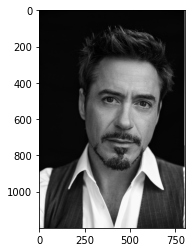

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img_resize = cv2.resize(img,(200,200))
img_resize.shape

(200, 200)

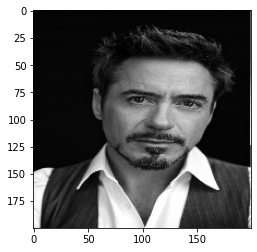

In [ ]:
plt.imshow(img_resize,cmap='gray')

In [ ]:
img_test = img_resize.reshape(1,200,200,1)

In [ ]:
model.predict_classes(img_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [ ]:
model.predict_classes(img_test)[0][0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [ ]:
labels[model.predict_classes(img_test)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'without_mask'

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Test/mask21.jpg',0)
img.shape

(1365, 2048)

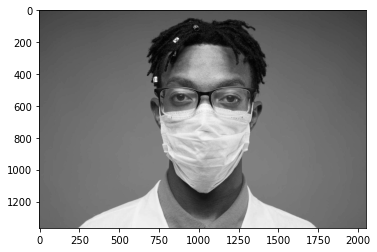

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img_resize = cv2.resize(img,(200,200))
img_resize.shape

(200, 200)

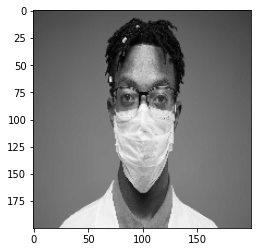

In [ ]:
plt.imshow(img_resize,cmap='gray')

In [ ]:
img_test = img_resize.reshape(1,200,200,1)

In [ ]:
model.predict_classes(img_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

In [ ]:
labels[model.predict_classes(img_test)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'with_mask'